In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
def preprocess(image,y):
    return image/255,y


In [3]:
ds,val_ds=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/mrl-eye-dataset/data/train",
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='grayscale',
    batch_size=16,
    image_size=(60,60),
    shuffle=True,
    seed=np.random.randint(500,size=1)[0],
    validation_split=0.1,
    subset='both',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 81675 files belonging to 2 classes.
Using 73508 files for training.
Using 8167 files for validation.


In [4]:
test_ds=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/mrl-eye-dataset/data/test",
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='grayscale',
    batch_size=16,
    image_size=(60,60),
    shuffle=True,
    seed=np.random.randint(500,size=1)[0],
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3223 files belonging to 2 classes.


In [5]:
ds=ds.map(preprocess)
val_ds=val_ds.map(preprocess)
test_ds=test_ds.map(preprocess)


In [16]:
input=tf.keras.Input(shape=(60,60))
layer=tf.keras.layers.Reshape((60,60,1))(input)
layer=tf.keras.layers.SeparableConv2D(32,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.Dropout(0.3)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
layer=tf.keras.layers.SeparableConv2D(64,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
layer=tf.keras.layers.MaxPool2D()(layer)
temp=layer
temp=tf.keras.layers.MaxPool2D()(temp)
layer=tf.keras.layers.SeparableConv2D(64,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.Dropout(0.35)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
layer=tf.keras.layers.SeparableConv2D(64,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
layer=tf.keras.layers.MaxPool2D()(layer)
layer=tf.keras.layers.Add()([layer,temp])
layer=tf.keras.layers.SeparableConv2D(96,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.Dropout(0.4)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
temp=layer
temp=tf.keras.layers.MaxPool2D()(temp)
layer=tf.keras.layers.SeparableConv2D(96,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
layer=tf.keras.layers.MaxPool2D()(layer)
layer=tf.keras.layers.SeparableConv2D(96,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.Dropout(0.4)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
layer=tf.keras.layers.Add()([layer,temp])
temp=layer
temp=tf.keras.layers.MaxPool2D()(temp)
layer=tf.keras.layers.SeparableConv2D(128,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
layer=tf.keras.layers.MaxPool2D()(layer)
layer=tf.keras.layers.SeparableConv2D(256,(3,3),strides=(1,1),padding='same',use_bias=False)(layer)
layer=tf.keras.layers.Dropout(0.4)(layer)
layer=tf.keras.layers.LeakyReLU()(layer)
layer=tf.keras.layers.Concatenate()([layer,temp])
layer=tf.keras.layers.Flatten()(layer)
layer=tf.keras.layers.Dense(1,activation='sigmoid')(layer)

model=tf.keras.Model(inputs=input,outputs=layer)


In [17]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 60, 60)]     0           []                               
                                                                                                  
 reshape_1 (Reshape)            (None, 60, 60, 1)    0           ['input_2[0][0]']                
                                                                                                  
 separable_conv2d_9 (SeparableC  (None, 60, 60, 32)  41          ['reshape_1[0][0]']              
 onv2D)                                                                                           
                                                                                                  
 dropout_5 (Dropout)            (None, 60, 60, 32)   0           ['separable_conv2d_9[0][0]'

In [19]:
model.compile(loss='bce',optimizer='Adam',metrics='Accuracy')


In [20]:
history=model.fit(ds,validation_data=val_ds,epochs=10)


Epoch 1/10


2023-06-16 11:28:22.848404: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


4595/4595 [==============================] - 110s 23ms/step - loss: 0.2205 - Accuracy: 0.9106 - val_loss: 0.1282 - val_Accuracy: 0.9487
Epoch 2/10
4595/4595 [==============================] - 76s 16ms/step - loss: 0.1073 - Accuracy: 0.9598 - val_loss: 0.0843 - val_Accuracy: 0.9705
Epoch 3/10
4595/4595 [==============================] - 76s 17ms/step - loss: 0.0832 - Accuracy: 0.9705 - val_loss: 0.0600 - val_Accuracy: 0.9788
Epoch 4/10
4595/4595 [==============================] - 76s 16ms/step - loss: 0.0712 - Accuracy: 0.9752 - val_loss: 0.0626 - val_Accuracy: 0.9798
Epoch 5/10
4595/4595 [==============================] - 76s 16ms/step - loss: 0.0625 - Accuracy: 0.9777 - val_loss: 0.0567 - val_Accuracy: 0.9811
Epoch 6/10
4595/4595 [==============================] - 79s 17ms/step - loss: 0.0572 - Accuracy: 0.9799 - val_loss: 0.0457 - val_Accuracy: 0.9844
Epoch 7/10
4595/4595 [==============================] - 80s 17ms/step - loss: 0.0546 - Accuracy: 0.9806 - val_loss: 0.0451 - val_Accur

In [21]:
model.evaluate(test_ds)


202/202 [==============================] - 4s 19ms/step - loss: 0.0664 - Accuracy: 0.9755


[0.0664045438170433, 0.9754886627197266]

In [22]:
history.history.keys()


dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

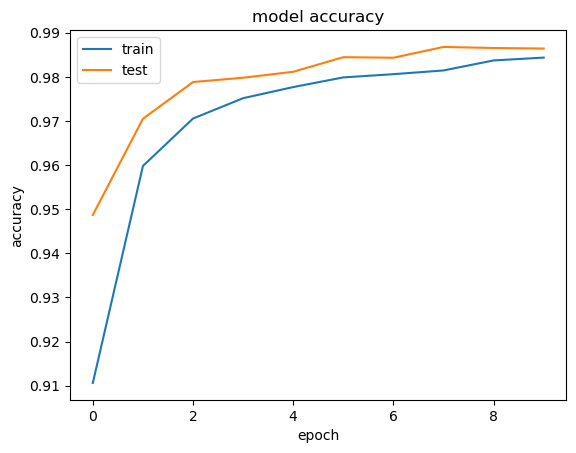

In [23]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


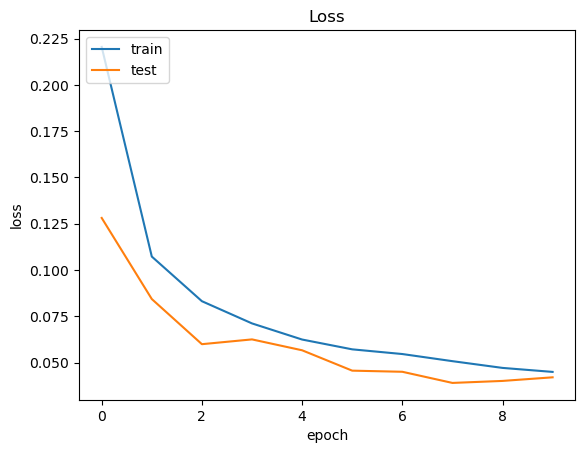

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


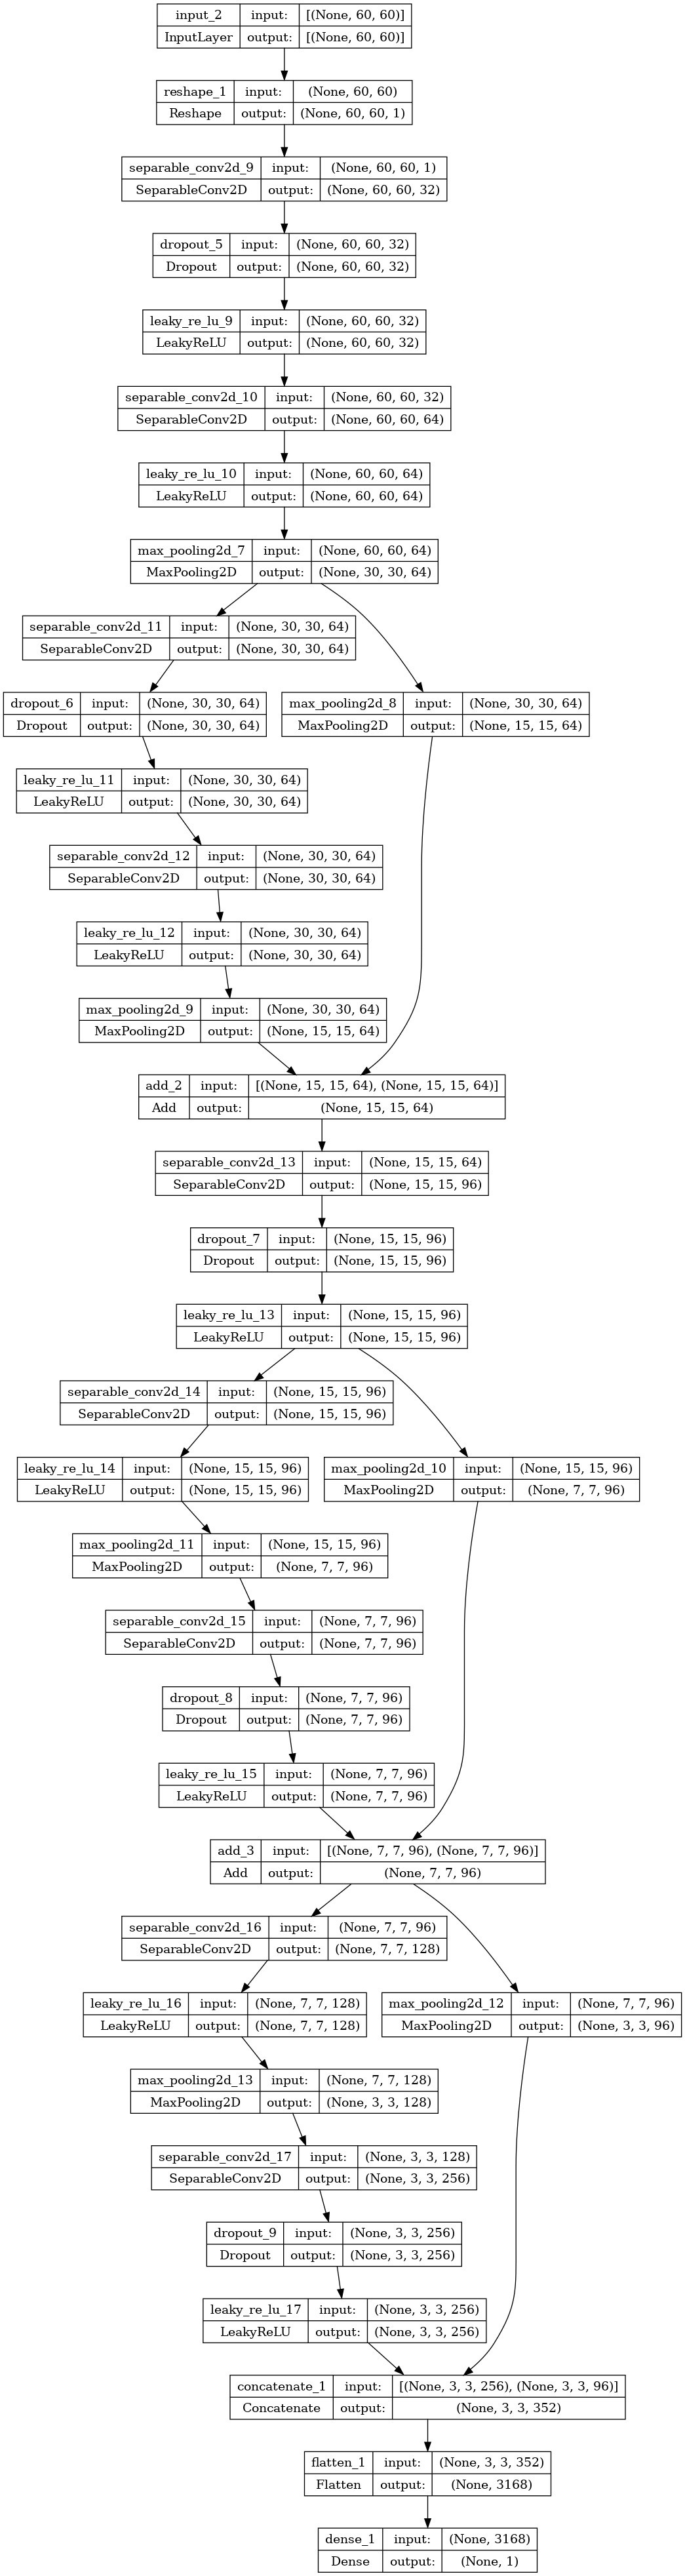

In [25]:
tf.keras.utils.plot_model(model,show_shapes=True)


In [26]:
model.save('final_model.h5')
